## Assignment 05 - Risk

This notebook will simulate 1000 individual battle rounds in Risk (3 attacker vs 2 defender) and plots the result.

One battle round is one shake of the attacker and defender dice.

For extra: 
A more complicated version simulates a full series of rounds for armies of arbitrary sizes, until one side is wiped out,

and plots the results.

### Rules of Risk

In Risk one army fights another. (using 6 sided dice)

In each battle round, the attacker can put forward up to three of their troops (3 dice).

The defender can use up to two of their defending troops (2 dice).

Each side looses troops depending on the following rules:

1. The two top dice dice are compared (ie the attackers top dice roll with the defenders top dice roll)  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;If the attackers dice is the same or lower they loose one troop otherwise the defender looses a troop (ie if the attackers dice is higher)
2. The next two highest dice from each side are then compared (ie the attackers second highest to the defenders second highest)  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;If the attackers dice is the same or lower they loose one troop otherwise the defender looses a troop (ie if the attackers dice is higher)


**Examples**
|Attacker rolls|Defender Roll|Attacker Loses|Defender Loses|Explanation|
|---|---|---|---|---|
|6,4,1	|5,3	|0	|2	|6 beats 5 and 4 beats 3 (the one is ignored as the lowest)|
|6,6,6	|6,3	|1	|1	|Defenders 6 beats the attackers first 6 and the attackers second 6 beats the defenders 3|
|5,4,4	|5,4	|2	|0	|The defenders 5 beat the attackers 5 and the defenders 4 beat the attackers 4 (defender wins when the dice are the same)|


In [114]:
# importing libraries
import numpy as np
import matplotlib.pyplot as plt
import csv
import pandas as pd

In [115]:
# defining dicts, lists and some variables to be used for the code

attacker_loses_per_round=[]
defender_loses_per_round=[]
total_attacker_losses = 0
total_defender_losses = 0

# creating csv file to store the results in after each round has run
csv_path = 'battle_results.csv'
with open(csv_path, mode='w', newline='') as file: # opening csv file and writing to a new line
    writer = csv.writer(file)
    #writing headers into the csv file
    writer.writerow(['Round', 'Attacker Roll', 'Defender Roll', 'Attacker Loses', 'Defender Loses', 'Total Attacker Loses', 'Total Defender Loses'])

    i = 1 
    while i != 0 and i < 1001: # while loop which will run for the 1000 rounds to generate the numbers
        # generating the numbers between 1 and 6 for the attacker & defender rolls and sorting from largest to smallest number 
        attacker_roll = np.sort(np.random.randint(1,7,3))[::-1] 
        defender_roll = np.sort(np.random.randint(1,7,2))[::-1] 

        attacker_loses = 0
        defender_loses = 0

        # print(f'Round {i}:\n\tAttacker rolls: {attacker_roll}\n\tDefender rolls: {defender_roll}') # used for testing

        r = 0
        while r < 2:
            if attacker_roll[r] == defender_roll[r]:
                attacker_loses += 1

            elif attacker_roll[r] > defender_roll[r]:
                defender_loses += 1
        
            else:
                attacker_loses += 1
            
            r += 1
        
        # updating total losses
        total_attacker_losses = total_attacker_losses + attacker_loses
        total_defender_losses = total_defender_losses + defender_loses

        attacker_loses_per_round.append(attacker_loses)
        defender_loses_per_round.append(defender_loses)
        
        # writing the round results to the CSV file
        writer.writerow([i, attacker_roll.tolist(), defender_roll.tolist(), attacker_loses, defender_loses, total_attacker_losses, total_defender_losses])

        i += 1 

    print("Results have been saved to 'battle_results.csv'")
    print(f'Total Attacker Losses: {total_attacker_losses}')
    print(f'Total Defender Losses: {total_defender_losses}')


Results have been saved to 'battle_results.csv'
Total Attacker Losses: 932
Total Defender Losses: 1068


In [116]:
# Reading in the data from the created CSV file
df = pd.read_csv(csv_path)

Text(0.5, 1.0, 'Total losses: Defender vs. Attacker')

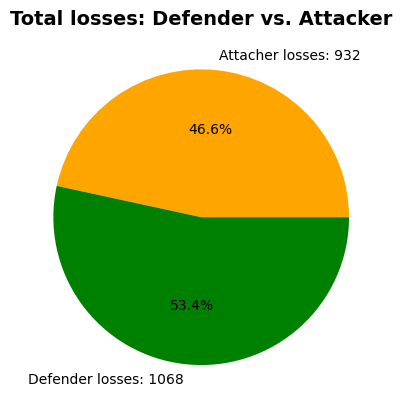

In [117]:
# Pie chart creation to visualise the defender loses vs the attacker loses

labels = (f'Attacher losses: {total_attacker_losses}', f'Defender losses: {total_defender_losses}') # setting the labels to be used in the chart and including the total amount of losses per side
sizes = [total_attacker_losses,total_defender_losses] #using the values for total attacker and defender losses to define the total to be used for the pie chat

# creating the plot
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=('orange', 'green')) #setting the size, labels and colours and enabling percentages in the image
plt.title('Total losses: Defender vs. Attacker', fontsize=14, weight='black') #setting the title for the plot


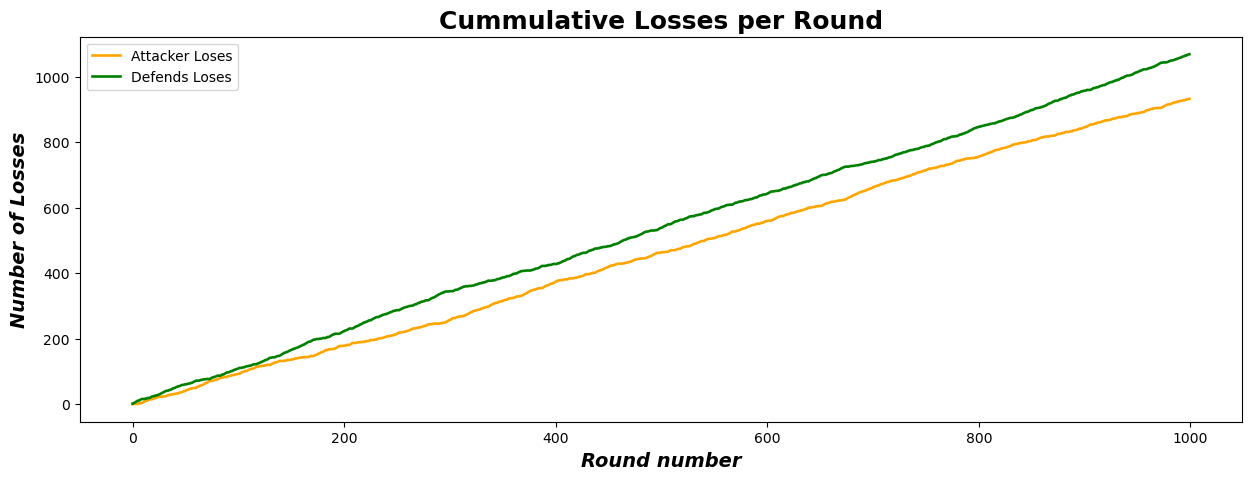

In [118]:
# Plotting cummulative losses per round 

plt.figure(figsize=(15,5)) # setting the size of the image
plt.plot(df['Total Attacker Loses'],label='Attacker Loses', marker='', linewidth=1.9, color='orange') # plotting the accummulative line in orange for the attacker
plt.plot(df['Total Defender Loses'],label='Defends Loses', marker='', linewidth=1.9, color='green') # plotting the accummulative line in green for the defender

# setting labels and title
plt.xlabel('Round number', fontsize=14, fontstyle='italic', weight='extra bold')
plt.ylabel('Number of Losses', fontsize=14, fontstyle='italic', weight='extra bold')
plt.legend()
plt.title('Cummulative Losses per Round', fontsize=18, weight='black')

# showing the plot
plt.show()


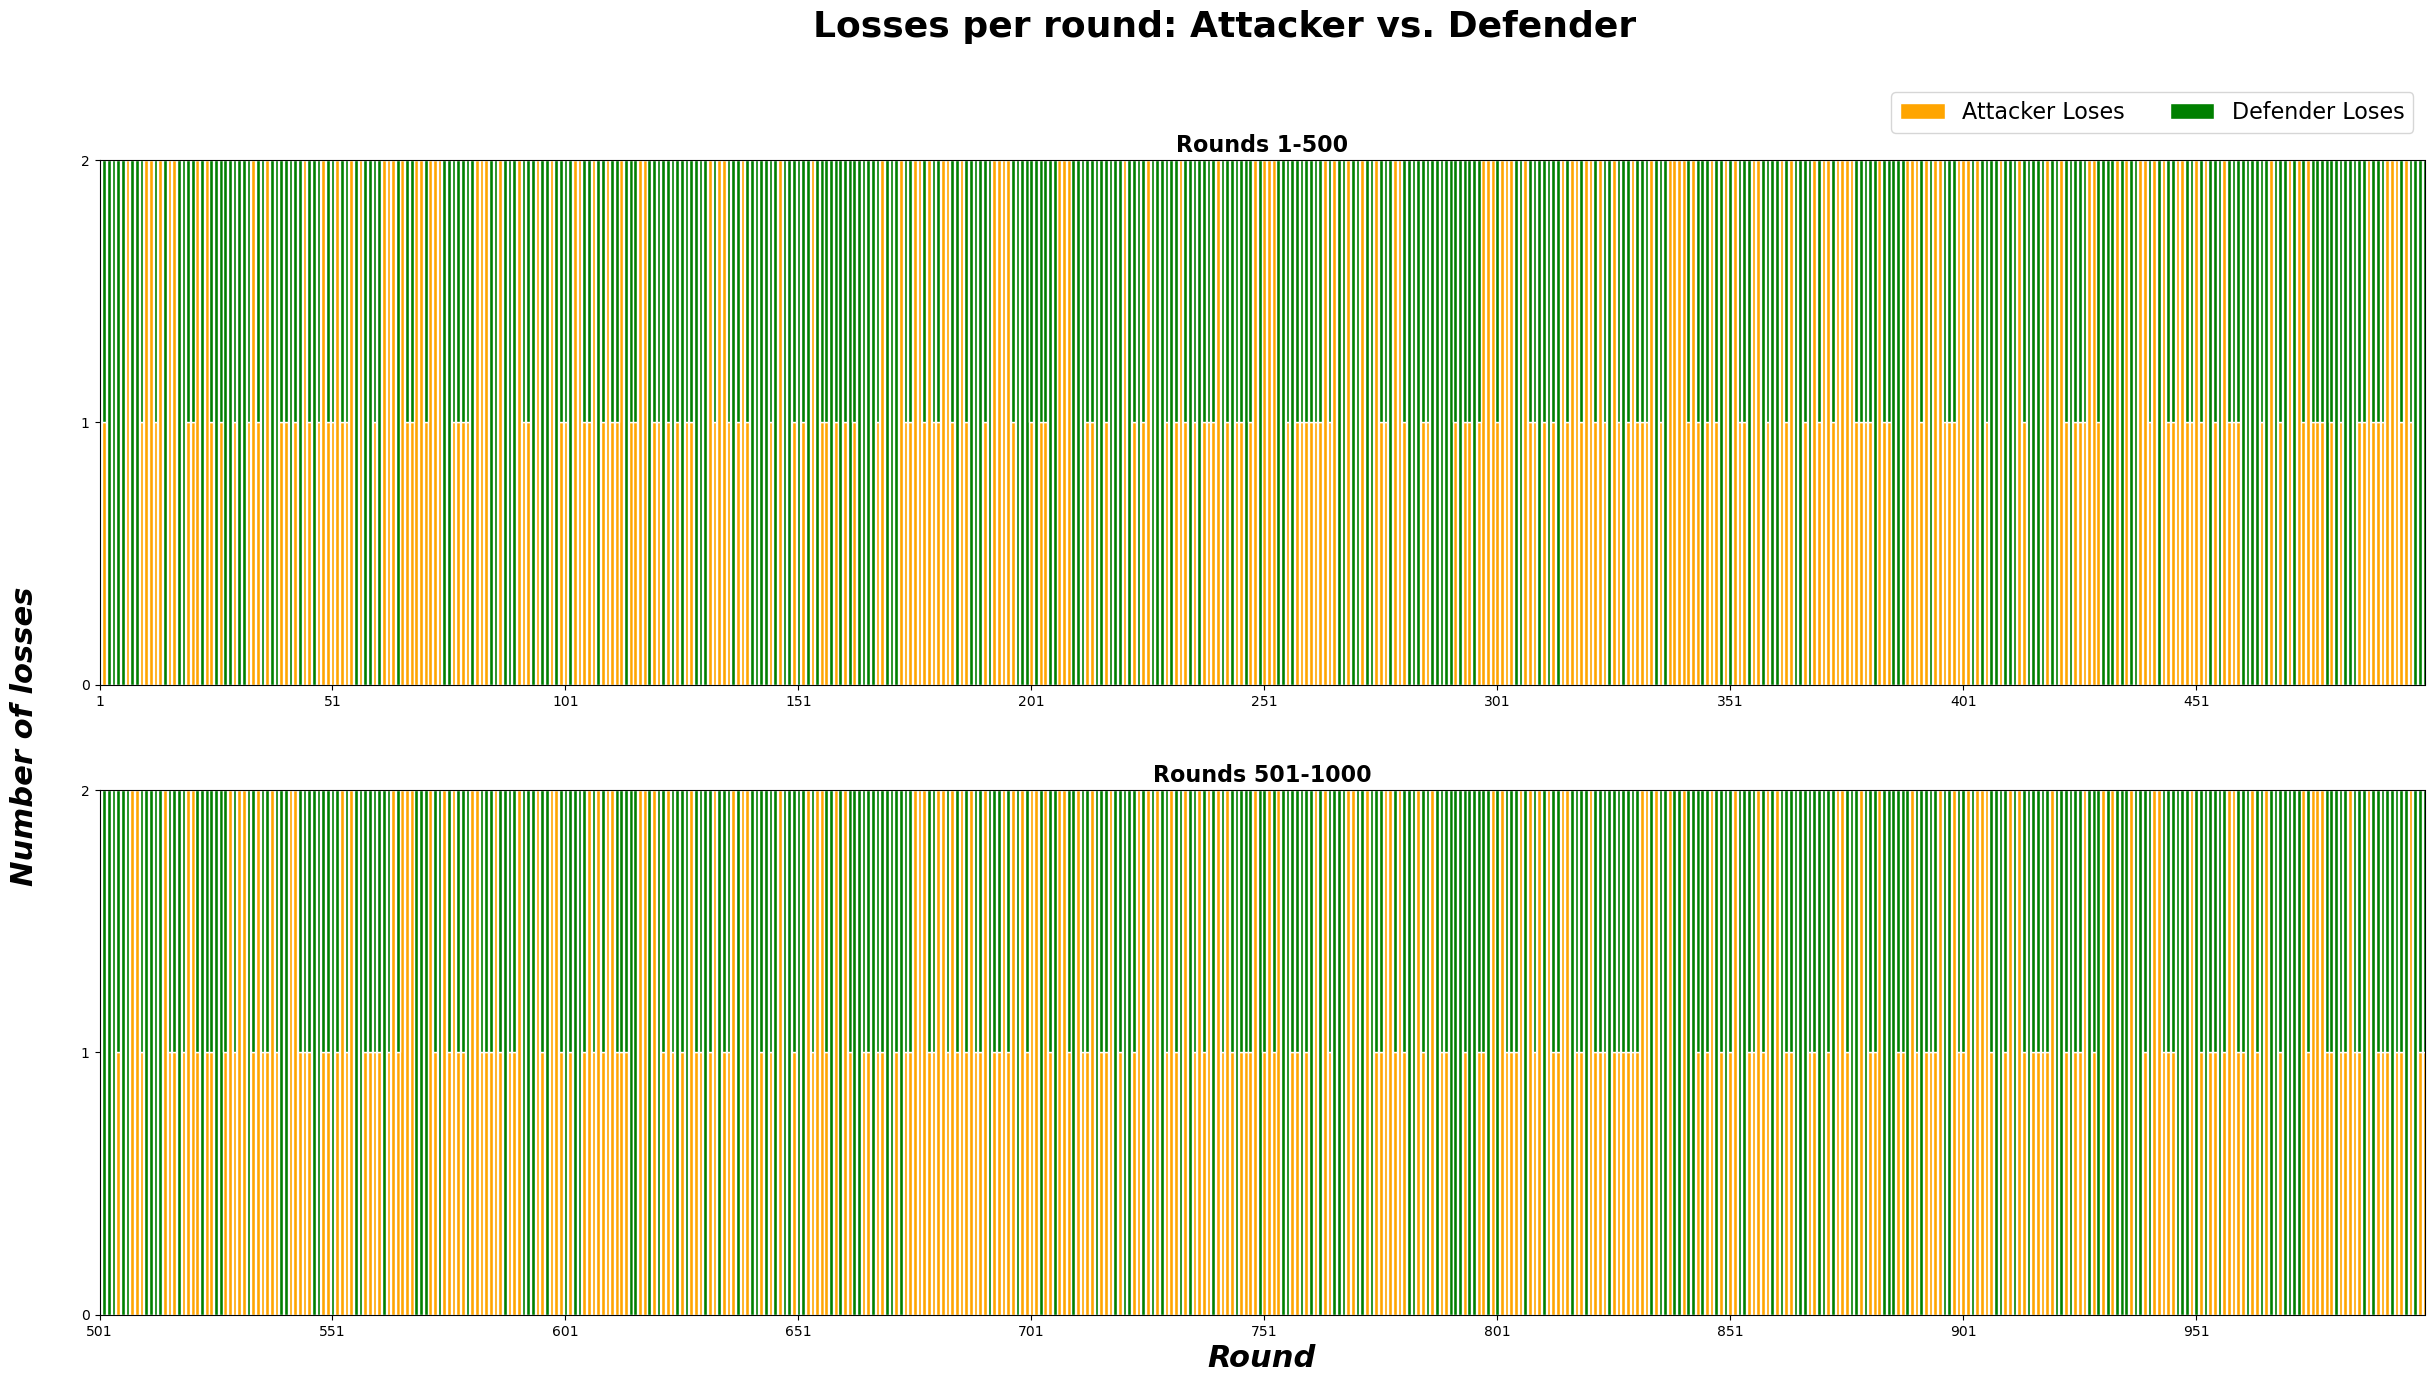

In [119]:
# creating subplots to break down the plot into two subplots to have a nicer visual

# defining the x-axis by setting up the ranges and rounds and the values for each bar
ranges = [(1, 500), (501, 1000)] # creating two ranges to be used for the subplots
plt.figure(figsize=(30, 15))  # adjusting figure size for the subplots

# creating a loop to iterate over the data for the specific ranges defined above and create a subplot using only the filtered data
for i, (start, end) in enumerate(ranges):
    # filtering the data for each range
    x = df['Round'][(df['Round'] >= start) & (df['Round'] <= end)] # selecting data to be used for the x axis in the loop
    attacker_losses = df['Attacker Loses'][(df['Round'] >= start) & (df['Round'] <= end)] # filtering the attacker losses info for the iteration
    defender_losses = df['Defender Loses'][(df['Round'] >= start) & (df['Round'] <= end)] # filtering the defender losses info for the iteration
    
    # creating the subplots in a 2x2 grid
    plt.subplot(2, 1, i + 1)
    
    # plotting the stacked bar chart for each range
    plt.bar(x, attacker_losses, edgecolor='white', label='Attacker Loses', color='orange') # setting the colour, title and label for the legend
    plt.bar(x, defender_losses, edgecolor='white', bottom=attacker_losses, label='Defender Loses', color='green') # setting the colour, title and label for the legend

    # setting the x-axis ticks for each subplot
    plt.xticks(range(start, end +1, 50))  # displaying every 25 rounds on the x-axis, using the values in the ranges for the iteration 
    plt.yticks(range(0,3,1)) # setting y axis as 0>2

    # adding labels, title, and limits for each subplot
    plt.xlim(start, end) # setting the limits using the range for the iteration
    plt.title(f'Rounds {start}-{end}', fontsize=16, weight= 'bold')

    if i == 1: # creating condition for the second plot only to add the x label as it's the same x label for both subplots
        plt.xlabel('Round', fontsize=22, fontstyle='italic', weight='extra bold') # setting the label and font settings

    # adding the legend, text to be used as a shared y lable using figtext and a overarching title for the subplots using suptitle.
    if i == 0:
        plt.legend(loc = 'upper right', ncols = 2, bbox_to_anchor=(1, 1.15),fontsize=16) # setting alignment, number of columns, location on plot and font size for legend
        plt.figtext(0.1, 0.4, 'Number of losses', ha='center', fontsize=22, fontstyle='italic', rotation = 'vertical', weight='extra bold') # setting location on plot, text, alignment, font size, stlye and weight
        plt.suptitle('Losses per round: Attacker vs. Defender', fontsize=26, weight='black') # setting title size and weight

plt.show()


## Extra complexity version
***

This section simulates a full series of rounds for armies of arbitrary sizes, until one side is wiped out.
The results are then displayed as a plot.

Results have been saved to 'battle_results_extra.csv'
Total Attacker Losses: 50
Total Defender Losses: 53


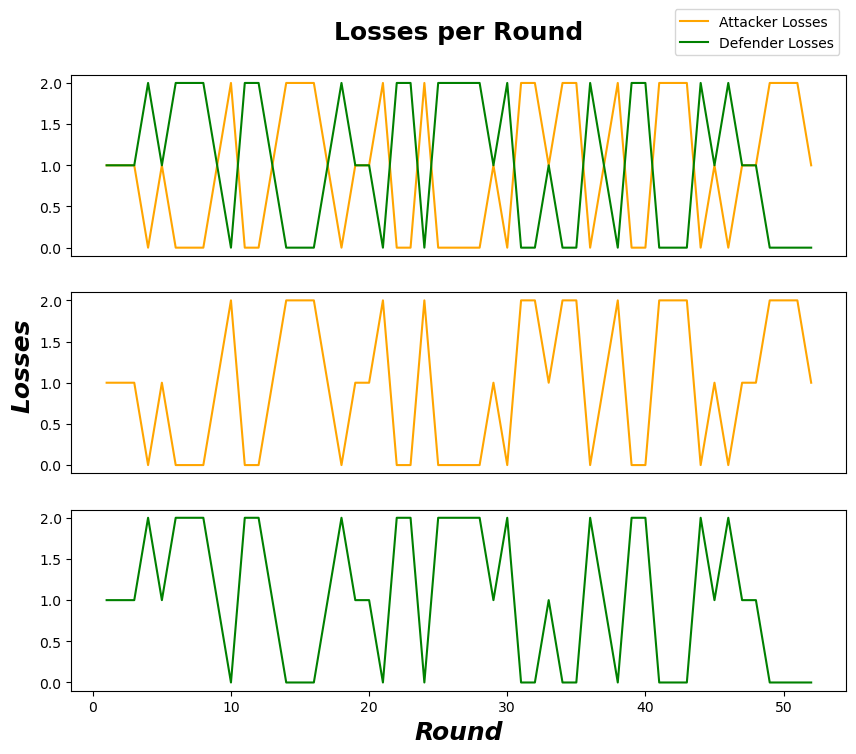

In [120]:
# defining lists and some variables to be used for the code
attacker_loses_per_round = []
defender_loses_per_round = []
total_attacker_losses = 0
total_defender_losses = 0

# setting initial army sizes, can be adjusted as desire
attacker_army_size = 50 
defender_army_size = 100 

# creating CSV file to store the results in after each round has run
with open('battle_results_extra.csv', mode='w', newline='') as file:
    writer = csv.writer(file)
    # writing headers into the CSV file
    writer.writerow(['Round', 'Attacker Rolls', 'Defender Rolls', 'Attacker Loses', 'Defender Loses', 
                     'Attacker Army Size', 'Defender Army Size'])

    i = 1 # used for dynamically saving round date
    while attacker_army_size > 0 and defender_army_size > 0:  # loop will continue until one side loses all of their army
        # generating rolls for the attacker and defender
        attacker_roll_temp = np.sort(np.random.randint(1, 7, min(3, attacker_army_size)))[::-1] # number of rolls is set using min to identify the smaller value, 3 (maximum number of rolls allowed for an attacker) or the value for attacker_army_size if that is smaller
        # this is then repeated for the defended with the max set to 2
        defender_roll_temp = np.sort(np.random.randint(1, 7, min(2, defender_army_size)))[::-1]

        attacker_loses = 0
        defender_loses = 0

        # simulating battles until all dice rolls are compared
        for roll in range(min(len(attacker_roll_temp), len(defender_roll_temp))): # min is used in this case to pick how many comparisons can be made depending on the number of rolls the attacker and defender has in that iteration as long as r is less than the min value the loop will continue
            if attacker_roll_temp[roll] == defender_roll_temp[roll]:
                attacker_loses += 1
            elif attacker_roll_temp[roll] > defender_roll_temp[roll]:
                defender_loses += 1
            else:
                attacker_loses += 1

        # updating the army sizes based on the loses for the round
        attacker_army_size -= attacker_loses
        defender_army_size -= defender_loses
        
        # updating the overall total loss values for both roles in the CSV
        total_attacker_losses += attacker_loses
        total_defender_losses += defender_loses

        # adding the number of loses for the round in the CSV 
        attacker_loses_per_round.append(attacker_loses)
        defender_loses_per_round.append(defender_loses)

        # writing round results to the CSV file
        writer.writerow([i, list(attacker_roll_temp), list(defender_roll_temp), attacker_loses, defender_loses, 
                         attacker_army_size, defender_army_size]) # if running the code multiple times be aware that the previous results will be overwritten
        
        i += 1 # updating the number for i, which is used for the round

    print("Results have been saved to 'battle_results_extra.csv'")
    print(f'Total Attacker Losses: {total_attacker_losses}')
    print(f'Total Defender Losses: {total_defender_losses}')

# plotting the results as a subplot showing the attacker losses and defender losses seperately
plt.figure(figsize=(10, 8))

plt.subplot(3, 1, 1) # showing the attacker losses per round
plt.plot(range(1, i), attacker_loses_per_round, label='Attacker Losses', color='orange')
plt.plot(range(1, i), defender_loses_per_round, label='Defender Losses', color='green')
plt.xticks([])
plt.legend(loc='upper right', bbox_to_anchor=(1, 1.40)) # setting the location for the legends 
plt.title('Losses per Round', fontsize=18, y=1.15, weight='black')


plt.subplot(3, 1, 2) # showing the attacker losses per round
plt.plot(range(1, i), attacker_loses_per_round, label='Attacker Losses', color='orange')
plt.xticks([])


plt.subplot(3, 1, 3) # showing the defender losses per round
plt.plot(range(1, i), defender_loses_per_round, label='Defender Losses', color='green')
plt.xlabel('Round', fontsize=18, fontstyle='italic', weight='black')
plt.ylabel('Losses', fontsize=18, y=1.8, fontstyle='italic', weight='black')

plt.show()